In [ ]:
from CPT.CPT import *

# Croatian site 

In [ ]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7
points = np.array([
[576697, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])


layout.add_measurements(measurements = points, points_type = 'initial')

In [ ]:
layout.optimize_measurements()
layout.plot_optimization()

In [ ]:
layout.generate_combined_layer(points_type = 'optimize')
layout.plot_layer(layout.combined_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')

In [ ]:
layout.add_lidars(lidar_pos_1 = np.array([580800 - 1800,4845300 + 2500, 271]))
layout.plot_layer(layout.combined_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')

In [ ]:
layout.generate_second_lidar_layer()
layout.plot_layer(layout.second_lidar_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')

In [ ]:
layout.add_lidars(lidar_pos_2 = np.array([579400 + 1200,4847700 - 2000,100]))
layout.generate_campaign_layout()

layout.plot_layer(layout.second_lidar_layer,title = 'Lidar placement map' , legend_label = 'Reachable points []')

In [ ]:
layout.measurements_reachable
layout.optimize_trajectory()
layout.plot_layout()

In [ ]:
layout.export_measurement_scenario()

# Scottish site

In [ ]:
# Ireland
layout = CPT()
layout.MESH_RES = 100
layout.REP_RADIUS = 250
layout.MESH_EXTENT = 4000
layout.AVERAGE_RANGE = 3000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('30U')
layout.MAX_ELEVATION_ANGLE = 5
points = np.array(
[
[534989 ,6184410 ,47],
[535205 ,6184536 ,47],
[535523 ,6184458 ,47],
[535837 ,6184425 ,47],
[536008 ,6184602 ,47],
[536288 ,6184670 ,47],
[535150 ,6184166 ,47],
[535468 ,6184187 ,47],
[535119 ,6183722 ,47],
[535382 ,6183935 ,47],
[535646 ,6183803 ,47],
[535865 ,6183938 ,47],
[536172 ,6184027 ,47],
[536404 ,6184103 ,47],
[535465 ,6183116 ,47],
[535432 ,6183632 ,47],
[535707 ,6183551 ,47],
[535958 ,6183688 ,47],
[536209 ,6183662 ,47],
[535636 ,6183310 ,47],
[535661 ,6182950 ,47],
[535440 ,6182744 ,47]
]

)
layout.add_measurements(measurements = points, points_type = 'initial')
layout.measurements_initial[:,2] = layout.measurements_initial[:,2] + layout.get_elevation('30U',layout.measurements_initial)
layout.optimize_measurements()
layout.generate_combined_layer(points_type = 'initial')

layout.plot_layer(layout.combined_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')



In [ ]:
layout.plot_optimization()

In [ ]:
layout.add_lidars(lidar_pos_1 = np.array([536062, 6182292, 350]))
layout.generate_second_lidar_layer()
layout.plot_layer(layout.second_lidar_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')


In [ ]:
layout.add_lidars(lidar_pos_2 = np.array([537262, 6183492, 304]))
layout.generate_campaign_layout()
layout.plot_layer(layout.second_lidar_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')

In [ ]:
layout.optimize_trajectory()
layout.plot_layout(save_plot = True)

In [ ]:
layout.export_measurement_scenario()

In [ ]:
import numpy as np

In [ ]:
lidar = {1:{'name' : 'whittle', 
            'position':np.array([12,34,5]), 
            'reachable_pts_id' : np.array([1,2,3]),
            'motion_program':"", 
            'rage_gate_file':""},
    10:{'name' : 'whittle', 
                'position':np.array([12,34,5]), 
                'reachable_pts_id' : np.array([1,2,3]),
                'motion_program':"", 
                'rage_gate_file':""}
        }

In [ ]:
bp = {23:{'name': 'John', 'age': '27', 'sex': 'Male'}}

In [ ]:
tmp = {12:{'name' : 'whittle', 
                'position':np.array([12,34,5]), 
                'reachable_pts_id' : np.array([1,2,3]),
                'motion_program':"", 
                'rage_gate_file':""}}

In [ ]:
lidar.update(tmp)

In [ ]:
lidar

In [1]:
from CPT.CPT_generic import *

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Adding initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Generating combined layer for initial measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


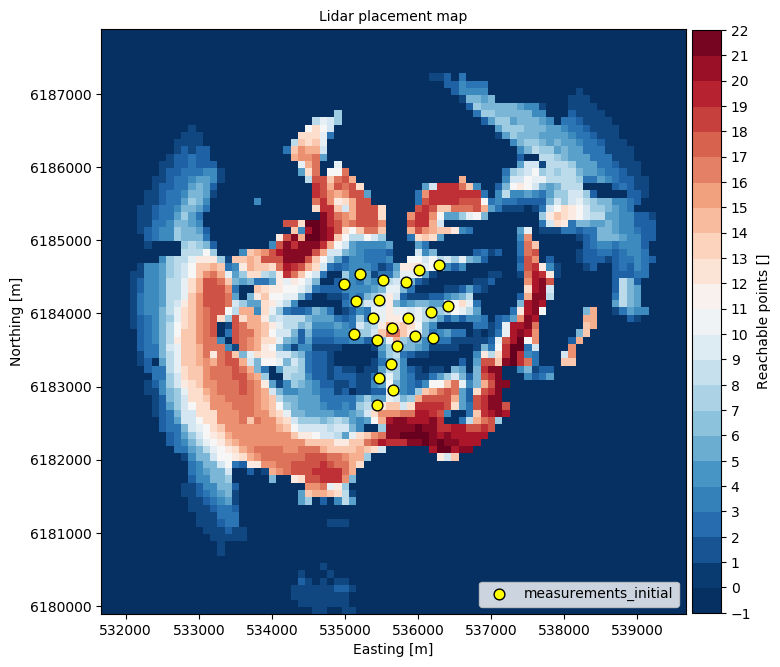

Lidar 'whittle' added to the class instance!


In [2]:
# Ireland
layout = CPT()
layout.MESH_RES = 100
layout.REP_RADIUS = 250
layout.MESH_EXTENT = 4000
layout.AVERAGE_RANGE = 3000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('30U')
layout.MAX_ELEVATION_ANGLE = 5
points = np.array(
[
[534989 ,6184410 ,47],
[535205 ,6184536 ,47],
[535523 ,6184458 ,47],
[535837 ,6184425 ,47],
[536008 ,6184602 ,47],
[536288 ,6184670 ,47],
[535150 ,6184166 ,47],
[535468 ,6184187 ,47],
[535119 ,6183722 ,47],
[535382 ,6183935 ,47],
[535646 ,6183803 ,47],
[535865 ,6183938 ,47],
[536172 ,6184027 ,47],
[536404 ,6184103 ,47],
[535465 ,6183116 ,47],
[535432 ,6183632 ,47],
[535707 ,6183551 ,47],
[535958 ,6183688 ,47],
[536209 ,6183662 ,47],
[535636 ,6183310 ,47],
[535661 ,6182950 ,47],
[535440 ,6182744 ,47]
]

)
layout.add_measurements(measurements = points, points_type = 'initial')
layout.measurements_initial[:,2] = layout.measurements_initial[:,2] + layout.get_elevation('30U',layout.measurements_initial)
layout.optimize_measurements()
layout.generate_combined_layer(points_type = 'initial')

layout.plot_layer(layout.combined_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')

layout.add_lidar(unique_id = "whittle", position = np.array([536062, 6182292, 350]))
layout.generate_second_lidar_layer(lidar_id = 'whittle')

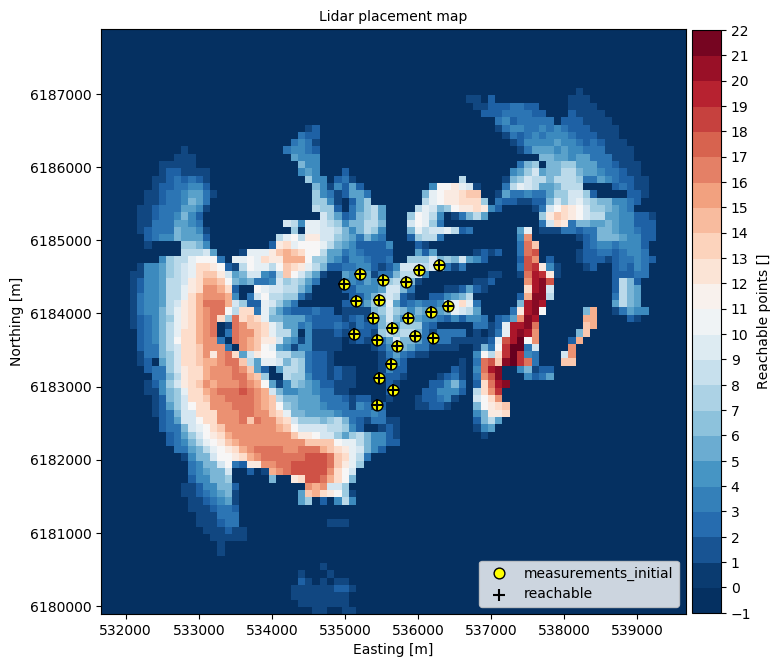

In [3]:
layout.plot_layer(layout.second_lidar_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')

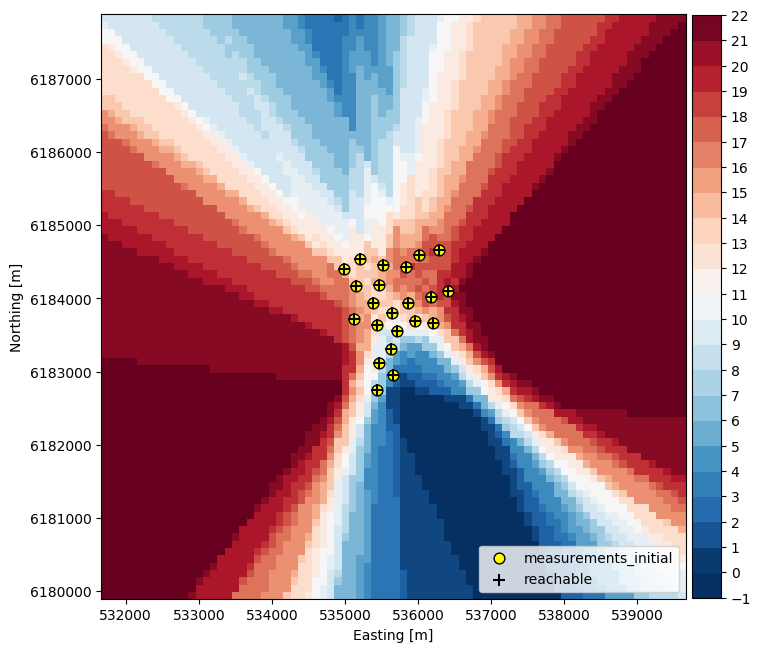

In [4]:
layout.plot_layer(layout.intersecting_angle_layer)

In [ ]:
self.generate_beam_coords(lidar_position,measurement_pts,0)[:,0]

In [ ]:
layout.plot_layer(layout.second_lidar_layer, title = 'Lidar placement map' , legend_label = 'Reachable points []')

In [ ]:
layout.add_lidar(id = "koshava", position = np.array([537262, 6183492, 304]))

In [ ]:
layout.lidar['joe']

In [ ]:
'whittle' in layout.lidar

In [ ]:
layout.lidar

In [ ]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [ ]:
points = np.array(
[
[534989 ,6184410 ,47],
[535205 ,6184536 ,47],
[535523 ,6184458 ,47],
[535837 ,6184425 ,47],
[536008 ,6184602 ,47],
[536288 ,6184670 ,47],
[535150 ,6184166 ,47],
[535468 ,6184187 ,47],
[535119 ,6183722 ,47],
[535382 ,6183935 ,47],
[535646 ,6183803 ,47],
[535865 ,6183938 ,47],
[536172 ,6184027 ,47],
[536404 ,6184103 ,47],
[535465 ,6183116 ,47],
[535432 ,6183632 ,47],
[535707 ,6183551 ,47],
[535958 ,6183688 ,47],
[536209 ,6183662 ,47],
[535636 ,6183310 ,47],
[535661 ,6182950 ,47],
[535440 ,6182744 ,47]
]

)
layout.add_measurements(measurements = points, points_type = 'initial')


In [ ]:
indexes = np.array([1,0,0,1,0])

In [ ]:
layout.add_lidar(unique_id = "whittle", position = np.array([536062, 6182292, 350]))

In [ ]:
points[np.where(indexes > 0)]